# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data["project_is_approved"].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [01:17<00:00, 646.95it/s]


In [19]:
# after preprocesing
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
preprocessed_essays[20000]

'teach title 1 school 73 students receive free reduced lunch school provides free breakfast students special education certified teacher teach kindergarten general education setting class consists 52 students special needs disabilities include autism spectrum disorder speech impaired language impaired health impaired adhd developmentally delayed also 42 students english language learners self motivated learners synonym students love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today could not ask better greeting students project greatly impact students learning daily basis wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning not really achieved full potential lac

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:03<00:00, 15816.17it/s]


In [21]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [22]:
#---------------------------------------------------------------------------------------
# Preprocessing Categorical Features: teacher_prefix
print(project_data['teacher_prefix'].value_counts())
print("="*100)

print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])

print("="*100)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
print(project_data['teacher_prefix'].value_counts())

print("="*100)
#---------------------------------------------------------------------------------------

Mrs.       26140
Ms.        17936
Mr.         4859
Teacher     1061
Dr.            2
Name: teacher_prefix, dtype: int64
30368    NaN
7820     NaN
Name: teacher_prefix, dtype: object
Mrs.       26142
Ms.        17936
Mr.         4859
Teacher     1061
Dr.            2
Name: teacher_prefix, dtype: int64


In [23]:
#-------------------------------------------------------------------------------------------------------
# Preprocessing Categorical Features: project_grade_category
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
#-------------------------------------------------------------------------------------------------------

# Splitting data into Train, cross validation and test: Stratified Sampling

In [24]:
from sklearn.model_selection import train_test_split
#How to split whole dataset into Train,CV and test
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
project_data_train, project_data_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
project_data_train, project_data_cv, y_train, y_cv = train_test_split(project_data_train, y_train, test_size=0.33, stratify=y_train)
print(project_data_train.shape, project_data_cv.shape, y_train.shape, y_cv)

(22445, 16) (11055, 16) (22445,) 34584    1
11434    0
48277    0
3710     1
4680     1
43337    0
38822    1
17860    1
26128    1
23569    1
37470    1
18126    1
41101    1
43442    1
40173    1
6161     1
13400    1
18261    0
18388    1
10422    1
43639    1
7738     1
1374     1
40266    1
42660    1
11908    1
3764     1
23092    1
87       1
44760    1
        ..
985      1
19691    1
2986     1
7666     1
38127    0
10291    0
20039    1
14814    1
16426    1
6814     1
11751    1
6747     1
2910     1
1478     1
45022    1
45106    1
46989    1
19326    1
22838    1
44868    1
38726    1
19969    1
23172    1
38640    1
23153    1
45121    1
41126    1
34502    1
12753    1
42279    1
Name: project_is_approved, Length: 11055, dtype: int64


In [25]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(project_data_train)/len(project_data)*100,'%\n','size:',len(project_data_train))
print('Cross validation dataset:',len(project_data_cv)/len(project_data)*100,'%\n','size:',len(project_data_cv))
print('Test dataset:',len(project_data_test)/len(project_data)*100,'%\n','size:',len(project_data_test))

Split ratio
--------------------------------------------------
Train dataset: 44.89 %
 size: 22445
Cross validation dataset: 22.11 %
 size: 11055
Test dataset: 33.0 %
 size: 16500


In [26]:
#Features
project_data_train.drop(['project_is_approved'], axis=1, inplace=True)
project_data_cv.drop(['project_is_approved'], axis=1, inplace=True)
project_data_test.drop(['project_is_approved'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [28]:
def VectorizingData(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)
    
def fnGetFeatures(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    return(vectorizer_feature.get_feature_names())

In [29]:
train_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_train)
cv_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_cv)
test_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_test)

print("Shape of training data matrix after one hot encoding ",train_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_categories_one_hot.shape)

cat_features = fnGetFeatures("clean_categories", project_data_train, project_data_train)
print(cat_features)

Shape of training data matrix after one hot encoding  (22445, 9)
Shape of cross validation data matrix after one hot encoding  (11055, 9)
Shape of test data matrix after one hot encoding  (16500, 9)
['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']


In [30]:
train_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_train)
cv_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_cv)
test_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_subcategories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_subcategories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_subcategories_one_hot.shape)

subCat_features = fnGetFeatures('clean_subcategories', project_data_train, project_data_train)
print(subCat_features)

Shape of train data matrix after one hot encoding  (22445, 30)
Shape of cross validation data matrix after one hot encoding  (11055, 30)
Shape of test data matrix after one hot encoding  (16500, 30)
['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']


In [31]:
train_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_train)
cv_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_cv)
test_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_school_state_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_school_state_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_school_state_category_one_hot.shape)

schoolState_features = fnGetFeatures('school_state', project_data_train, project_data_train)
print(schoolState_features)

Shape of train data matrix after one hot encoding  (22445, 51)
Shape of cross validation data matrix after one hot encoding  (11055, 51)
Shape of test data matrix after one hot encoding  (16500, 51)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [32]:
train_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_train)
cv_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_cv)
test_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_project_grade_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_project_grade_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_project_grade_category_one_hot.shape)

projectGradeCat_features = fnGetFeatures('project_grade_category', project_data_train, project_data_train)
print(projectGradeCat_features)

Shape of train data matrix after one hot encoding  (22445, 4)
Shape of cross validation data matrix after one hot encoding  (11055, 4)
Shape of test data matrix after one hot encoding  (16500, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [33]:
train_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_train)
cv_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_cv)
test_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_teacher_prefix_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_teacher_prefix_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_teacher_prefix_categories_one_hot.shape)

teacherPrefix_features = fnGetFeatures('teacher_prefix', project_data_train, project_data_train)
print(teacherPrefix_features)

Shape of train data matrix after one hot encoding  (22445, 5)
Shape of cross validation data matrix after one hot encoding  (11055, 5)
Shape of test data matrix after one hot encoding  (16500, 5)
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [34]:
def VectorizingTextData(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True, min_df = 10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)

def fnGetTextFeatures(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True, min_df = 10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    return(vectorizer_feature.get_feature_names())

In [35]:
train_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_train)
cv_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_cv)
test_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_bow.shape)

essay_features = fnGetTextFeatures('preprocessed_essays', project_data_train, project_data_train)
print(essay_features)

Shape of train data matrix after one hot encoding  (22445, 5000)
Shape of cross validation data matrix after one hot encoding  (11055, 5000)
Shape of test data matrix after one hot encoding  (16500, 5000)
['000', '10', '100', '100 free', '100 percent', '100 students', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '20 students', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '300', '35', '3d', '3rd', '3rd grade', '3rd graders', '40', '40 students', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th graders', '60', '60 minutes', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '95 students', '98', '9

In [36]:
train_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_train)
cv_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_cv)
test_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_title_bow.shape)

title_features = fnGetTextFeatures('preprocessed_titles', project_data_train, project_data_train)
print(title_features)

Shape of train data matrix after one hot encoding  (22445, 1899)
Shape of cross validation data matrix after one hot encoding  (11055, 1899)
Shape of test data matrix after one hot encoding  (16500, 1899)
['05', '10', '101', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd', '2nd grade', '2nd graders', '3d', '3d printer', '3d printing', '3doodler', '3rd', '3rd grade', '3rd graders', '4th', '4th grade', '4th graders', '5th', '5th grade', '5th graders', '6th', '6th grade', '7th', 'abc', 'about', 'about it', 'about reading', 'academic', 'access', 'access technology', 'accessible', 'accessing', 'accessories', 'achievement', 'across', 'act', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students', 'activities', 'activity', 'add', 'adding', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all', 'all about', 'all day', 'all hands', 'all learners',

#### 1.5.2.2 tfidf

In [37]:
def tfidf_Vectorizer(sFeature, project_data_fitting,project_data_transform):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer_tfidf_feature = TfidfVectorizer(min_df=10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_tfidf_feature.fit(project_data_train[sFeature])      #Fitting has to be on Train data

    tfidf_vect = vectorizer_tfidf_feature.transform(project_data_transform[sFeature].values)
    return(tfidf_vect)

In [38]:
train_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_train)
cv_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_cv)
test_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (22445, 5000)
Shape of cross validation data matrix after one hot encoding  (11055, 5000)
Shape of test data matrix after one hot encoding  (16500, 5000)


In [39]:
train_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_train)
cv_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_cv)
test_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (22445, 1899)
Shape of cross validation data matrix after one hot encoding  (11055, 1899)
Shape of test data matrix after one hot encoding  (16500, 1899)


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [40]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [41]:

# average Word2Vec
# compute average word2vec for each review.
train_No_ofWords_essays=[];
train_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_essays.append(vector)
    train_No_ofWords_essays.append(len(sentence.split()))
    
print(len(train_avg_w2v_essays))
print(len(train_avg_w2v_essays[0]))

100%|██████████| 22445/22445 [00:30<00:00, 730.84it/s]

22445
300


In [42]:
len(train_No_ofWords_essays)

22445

In [43]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_essays = []; 
cv_No_ofWords_essays=[];# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_essays.append(vector)
    cv_No_ofWords_essays.append(len(sentence.split()))

print(len(cv_avg_w2v_essays))
print(len(cv_avg_w2v_essays[0]))
print(len(cv_No_ofWords_essays))

100%|██████████| 11055/11055 [00:15<00:00, 695.52it/s]

11055
300
11055


In [44]:
# compute average word2vec for each review.
test_No_ofWords_essays=[];
test_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_essays.append(vector)
    test_No_ofWords_essays.append(len(sentence.split()))

print(len(test_avg_w2v_essays))
print(len(test_avg_w2v_essays[0]))
print(len(test_No_ofWords_essays))

100%|██████████| 16500/16500 [00:22<00:00, 744.14it/s] 

16500
300
16500


In [45]:
# average Word2Vec
# compute average word2vec for each review.
train_No_ofWords_titles=[];
train_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_titles.append(vector)
    train_No_ofWords_titles.append(len(sentence.split()))
                                   
print(len(train_avg_w2v_titles))
print(len(train_avg_w2v_titles[0]))
print(len(train_No_ofWords_titles))

100%|██████████| 22445/22445 [00:01<00:00, 16130.62it/s]

22445
300
22445


In [46]:
# average Word2Vec
# compute average word2vec for each review.
cv_No_ofWords_titles=[];
cv_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_titles.append(vector)
    cv_No_ofWords_titles.append(len(sentence.split()))

print(len(cv_avg_w2v_titles))
print(len(cv_avg_w2v_titles[0]))
print(len(cv_No_ofWords_titles))

100%|██████████| 11055/11055 [00:00<00:00, 14595.95it/s]

11055
300
11055


In [47]:
# average Word2Vec
# compute average word2vec for each review.
test_No_ofWords_titles=[];
test_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_titles.append(vector)
    test_No_ofWords_titles.append(len(sentence.split()))

print(len(test_avg_w2v_titles))
print(len(test_avg_w2v_titles[0]))
print(len(test_No_ofWords_titles))

100%|██████████| 16500/16500 [00:00<00:00, 16615.79it/s]

16500
300
16500


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [48]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 22445/22445 [00:02<00:00, 10555.44it/s]

22445
300


In [50]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)

print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))

100%|██████████| 11055/11055 [00:01<00:00, 9729.48it/s] 

11055
300


In [51]:
# compute average word2vec for each review.
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 16500/16500 [00:01<00:00, 9519.00it/s]

16500
300


In [52]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 22445/22445 [03:03<00:00, 122.45it/s]

22445
300


In [54]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)

print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))

100%|██████████| 11055/11055 [01:47<00:00, 102.67it/s]

11055
300


In [55]:
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 16500/16500 [02:38<00:00, 104.42it/s]

16500
300


### 1.5.3 Vectorizing Numerical features

In [56]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')
project_data_cv = pd.merge(project_data_cv, price_data, on='id', how='left')
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [57]:
from sklearn.preprocessing import Normalizer
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer = Normalizer()
normalizer.fit(project_data_train['price'].values.reshape(-1,1)) 


price_normalized_train = normalizer.transform(project_data_train['price'].values.reshape(-1, 1))
price_normalized_cv = normalizer.transform(project_data_cv['price'].values.reshape(-1, 1))
price_normalized_test = normalizer.transform(project_data_test['price'].values.reshape(-1, 1))


print('After normalization')
print(price_normalized_train.shape)
print(price_normalized_cv.shape)
print(price_normalized_test.shape)

After normalization
(22445, 1)
(11055, 1)
(16500, 1)


In [58]:
normalizer = Normalizer()
normalizer.fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 


# Now standardize the data with above maen and variance.
previously_posted_projects_normalized_train = normalizer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_cv = normalizer.transform(project_data_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_test = normalizer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print('After normalization')
print(previously_posted_projects_normalized_train.shape)
print(previously_posted_projects_normalized_cv.shape)
print(previously_posted_projects_normalized_test.shape)

After normalization
(22445, 1)
(11055, 1)
(16500, 1)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>

In [62]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_tfidf, train_title_tfidf, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_tfidf, test_title_tfidf, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22445, 6966) (22445,)
(16500, 6966) (16500,)


###  Using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(class_weight = 'balanced')

tree_para = {'max_depth':[1, 5, 10, 50],'min_samples_split': [5, 10, 100, 500]}

clf =  GridSearchCV(DecisionTreeClassifier, tree_para, cv=10)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [68]:
clf.best_params_

{'max_depth': 1, 'min_samples_split': 5}

#### Find best parameter using 'GridSearchCV'

In [69]:
max_d = clf.best_params_['max_depth']
min_samp_splt = clf.best_params_['min_samples_split']

#### 3d_scatter_plot

Text(0.5,0,'mean_train_score')

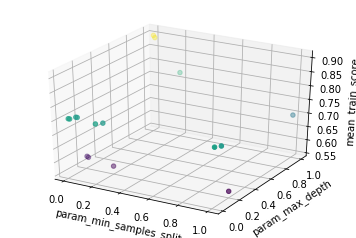

In [70]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

yline = clf.cv_results_['param_max_depth']
xline = clf.cv_results_['param_min_samples_split']
zline = clf.cv_results_['mean_train_score']
yline  = norm = [float(i)/max(yline ) for i in yline]
xline  = norm = [float(i)/max(xline ) for i in xline]

ax.scatter3D(list(xline), list(yline), list(zline), c=list(zline))
ax.set_xlabel('param_min_samples_split')
ax.set_ylabel('param_max_depth')
ax.set_zlabel('mean_train_score')

Text(0.5,0,'mean_train_score')

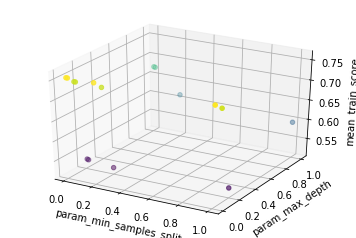

In [71]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

yline = clf.cv_results_['param_max_depth']
xline = clf.cv_results_['param_min_samples_split']
zline = clf.cv_results_['mean_test_score']
yline  = norm = [float(i)/max(yline ) for i in yline]
xline  = norm = [float(i)/max(xline ) for i in xline]

ax.scatter3D(list(xline), list(yline), list(zline), c=list(zline))
ax.set_xlabel('param_min_samples_split')
ax.set_ylabel('param_max_depth')
ax.set_zlabel('mean_train_score')

#### Heat map

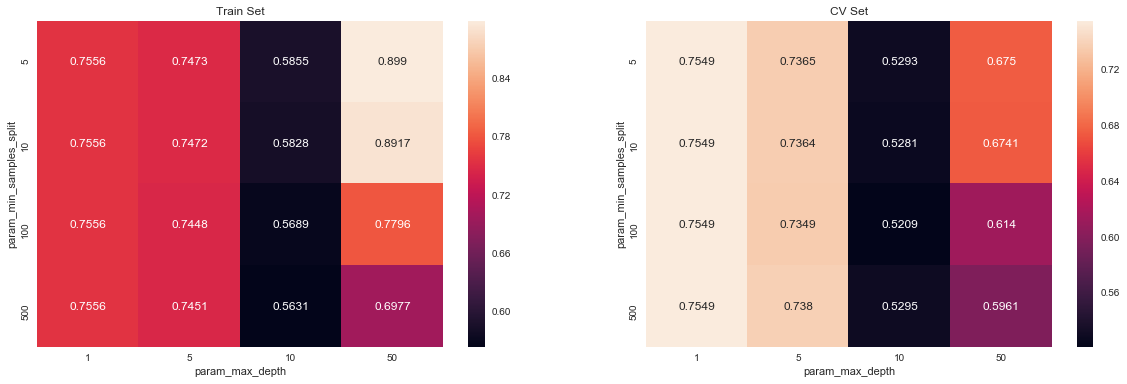

In [72]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [84]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

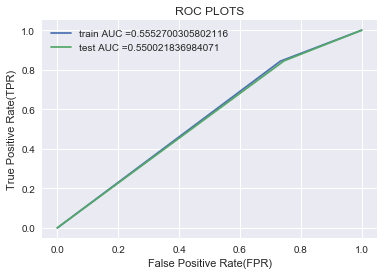

In [77]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt, class_weight='balanced')
DecisionTreeClassifier.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted output
y_train_pred =  batch_predict(DecisionTreeClassifier, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(DecisionTreeClassifier, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [83]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions_
    
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_ = predictions
    return predictions

In [91]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.2252882824414138 for threshold 0.535
Train confusion matrix
[[  925  2538]
 [ 2972 16010]]
Test confusion matrix
[[  649  1897]
 [ 2161 11793]]


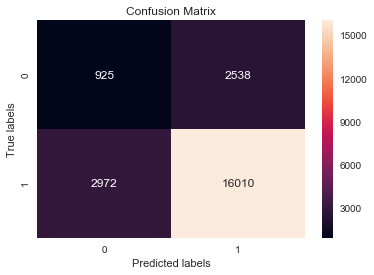

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

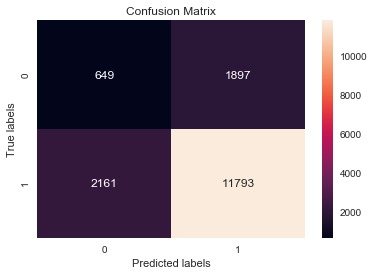

In [93]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### Analysis on the False positives

In [114]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpindex = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions_[i] == 1) :
        fpindex.append(i)
fp_essay = []
fp_price = []
for i in fpindex :
    fp_essay.append(preprocessed_essays[i])
    fp_price.append(price_normalized_test[i])
df5 = pd.DataFrame(fp_price,columns =['price'])

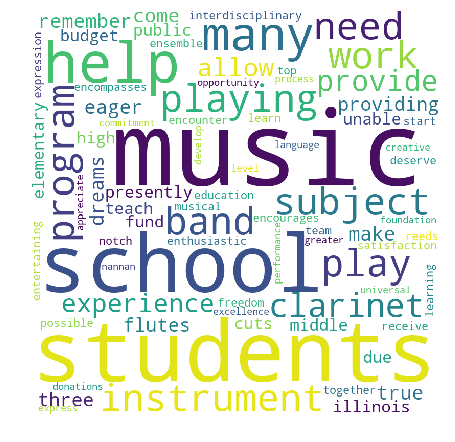

In [115]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### BoxPlot

In [143]:
# first get the columns:
cols = project_data_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpindex: # (in fpi all the false positives data points indexes)
    X_test_falsePos = X_test_falsePos.append(project_data_test.filter(items=[i], axis=0))

X_test_falsePos.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_titles,price,quantity
16479,87043,p184486,3e12bc30db8a5b4247fc0113545a0fb0,Ms.,NY,2016-11-30 19:29:59,grades_3_5,3rd Grade Students Excited About Science!,My students need snap circuits to assist them ...,0,Math_Science,AppliedSciences Mathematics,I teach 3rd grade to an amazing group of stude...,teach 3rd grade amazing group students mix gen...,3rd grade students excited about science,34.95,7
0,111426,p082605,08b8467acca77d4c72bc03e87fc24e65,Ms.,MT,2016-11-27 14:02:37,grades_3_5,Science and Stem Away!,My students need the tools to explore and lear...,0,Math_Science,AppliedSciences EnvironmentalScience,"Miles City is a small community of about 10,00...",miles city small community 10 000 people small...,science stem away,499.99,25


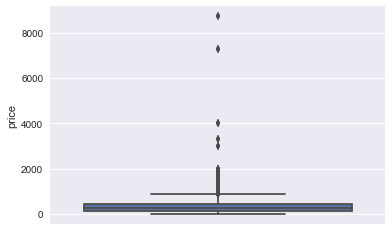

In [144]:
sns.boxplot(y='price', data=X_test_falsePos)

### PDF

[9.49927527e-01 3.16247200e-02 8.96033733e-03 5.79786533e-03
 2.10831467e-03 1.05415733e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.27078666e-04]
[  0.   32.2  64.4  96.6 128.8 161.  193.2 225.4 257.6 289.8 322. ]


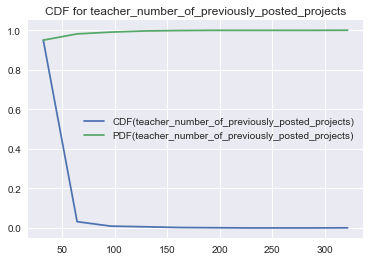

In [146]:
feature = 'teacher_number_of_previously_posted_projects'
counts, bin_edges = np.histogram(X_test_falsePos[feature], bins=10, 
                                         density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:], cdf)
plt.legend(['CDF'+ '(' +feature + ')','PDF'+'('+feature+ ')'])

plt.title('CDF for ' + feature)
plt.show();

## <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>

In [124]:
X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot, train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train ,  previously_posted_projects_normalized_train, train_tfidf_w2v_essays, train_tfidf_w2v_titles)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot, test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test,  previously_posted_projects_normalized_test, test_tfidf_w2v_essays, test_tfidf_w2v_titles)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_school_state_category_one_hot, cv_project_grade_category_one_hot, cv_teacher_prefix_categories_one_hot, price_normalized_cv,previously_posted_projects_normalized_cv,  cv_tfidf_w2v_essays, cv_tfidf_w2v_titles)).tocsr()

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(22445, 701)
(11055, 701)
(16500, 701)


###  Using GridSearchCV# 

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(class_weight = 'balanced')

tree_para = {'max_depth':[1, 5, 10, 50],'min_samples_split': [5, 10, 100, 500]}

clf =  GridSearchCV(DecisionTreeClassifier, tree_para, cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0.5,0,'mean_train_score')

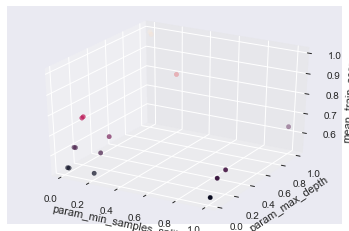

In [126]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

yline = clf.cv_results_['param_max_depth']
xline = clf.cv_results_['param_min_samples_split']
zline = clf.cv_results_['mean_train_score']
yline  = norm = [float(i)/max(yline ) for i in yline]
xline  = norm = [float(i)/max(xline ) for i in xline]

ax.scatter3D(list(xline), list(yline), list(zline), c=list(zline))
ax.set_xlabel('param_min_samples_split')
ax.set_ylabel('param_max_depth')
ax.set_zlabel('mean_train_score')

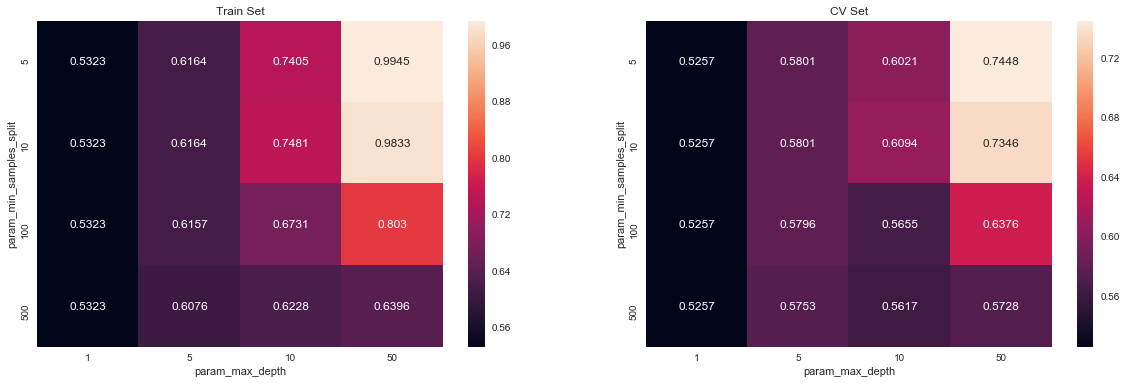

In [127]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [140]:
max_d = clf.best_params_['max_depth']
min_samp_splt = clf.best_params_['min_samples_split']

5


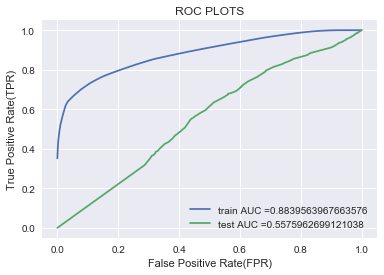

In [130]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(max_depth = 10, min_samples_split = min_samp_splt, class_weight='balanced')
DecisionTreeClassifier.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted output
y_train_pred =  batch_predict(DecisionTreeClassifier, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(DecisionTreeClassifier, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [131]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions_
    
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_ = predictions
    return predictions

In [132]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6535179474403962 for threshold 0.477
Train confusion matrix
[[ 3086   377]
 [ 5063 13919]]
Test confusion matrix
[[1138 1408]
 [4639 9315]]


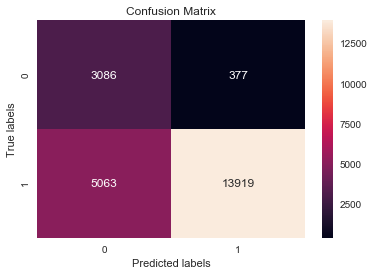

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

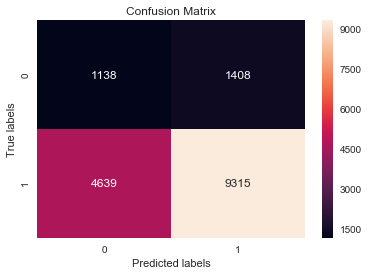

In [134]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [135]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpindex = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions_[i] == 1) :
        fpindex.append(i)
fp_essay = []
fp_price = []
for i in fpindex :
    fp_essay.append(preprocessed_essays[i])
    fp_price.append(price_normalized_test[i])
df5 = pd.DataFrame(fp_price,columns =['price'])

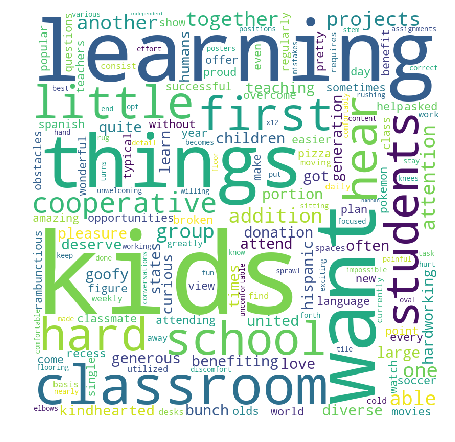

In [136]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [137]:
# first get the columns:
cols = project_data_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpindex: # (in fpi all the false positives data points indexes)
    
  X_test_falsePos = X_test_falsePos.append(project_data_test.filter(items=[i], axis=0))

X_test_falsePos.head(2)

,0,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_titles,price,quantity
5,NaN,163188.0,p131454,342b77c0ed2def752fd73f0e702a390a,Mrs.,TX,2016-09-01 18:41:21,grades_prek_2,Developing Language in My Little Learners!,My students need tools and supplies for their ...,0.0,Literacy_Language,ESL Literature_Writing,My students are bilingual learners who have ha...,students bilingual learners hard working paren...,developing language my little learners,437.08,8.0
15,NaN,20866.0,p233783,581d824f8cac22066134853b2f420eb7,Mrs.,IL,2016-09-25 16:05:25,grades_6_8,Teacher On The Go!!!,My students need their teacher to be organized...,16.0,Literacy_Language,Literacy,As a teacher in a low-income/high poverty scho...,teacher low income high poverty school distric...,teacher on the go,421.40,1.0


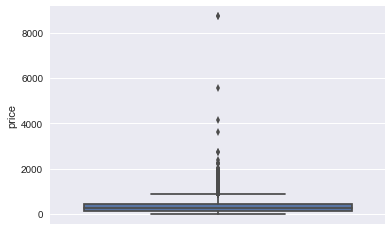

In [138]:
sns.boxplot(y='price', data=X_test_falsePos)

[0.92075587 0.04327949 0.01249619 0.00701006 0.00426699 0.00518135
 0.00121914 0.0021335  0.00182871 0.00182871]
[  0.   21.1  42.2  63.3  84.4 105.5 126.6 147.7 168.8 189.9 211. ]


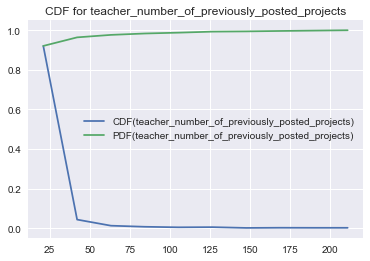

In [139]:
feature = 'teacher_number_of_previously_posted_projects'
counts, bin_edges = np.histogram(X_test_falsePos[feature], bins=10, 
                                         density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:], cdf)
plt.legend(['CDF'+ '(' +feature + ')','PDF'+'('+feature+ ')'])

plt.title('CDF for ' + feature)
plt.show();

## <li><font color='red'>Set 3</font>: Performing DecisionTreeClassifier on the data set formed with best 5000features</li>      

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_tfidf, train_title_tfidf, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_tfidf, test_title_tfidf, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
type(X_train)

(22445, 7000) (22445,)
(16500, 7000) (16500,)


scipy.sparse.csr.csr_matrix

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(class_weight = 'balanced')

tree_para = {'max_depth':[1, 5, 10, 50],'min_samples_split': [5, 10, 100, 500]}

clf =  GridSearchCV(DecisionTreeClassifier, tree_para, cv=6)

clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
max_d = clf.best_params_['max_depth']
min_samp_splt = clf.best_params_['min_samples_split']
max_d


1

In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt, class_weight='balanced')
DecisionTreeClassifier.fit(X_train ,y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
BestFeatures_df=pd.DataFrame(DecisionTreeClassifier.feature_importances_)
BestFeatures_df.shape

(7000, 1)

In [110]:
sorted_tfidf_df=BestFeatures_df.sort_values(by=0,ascending=False)
BestFeatures = sorted_tfidf_df[:5000].index.tolist()
print(BestFeatures)

[2758, 0, 4663, 4673, 4672, 4671, 4670, 4669, 4668, 4667, 4666, 4665, 4664, 4662, 4675, 4661, 4660, 4659, 4658, 4657, 4656, 4655, 4654, 4653, 4652, 4651, 4674, 4676, 4649, 4677, 4700, 4699, 4698, 4697, 4696, 4695, 4694, 4693, 4692, 4691, 4690, 4689, 4688, 4687, 4686, 4685, 4684, 4683, 4682, 4681, 4680, 4679, 4678, 4650, 4648, 4702, 4608, 4619, 4618, 4617, 4616, 4615, 4614, 4613, 4612, 4611, 4610, 4609, 4607, 4647, 4606, 4605, 4604, 4603, 4602, 4601, 4600, 4599, 4598, 4597, 4596, 4620, 4621, 4622, 4623, 4646, 4645, 4644, 4643, 4642, 4641, 4640, 4639, 4638, 4637, 4636, 4635, 4634, 4633, 4632, 4631, 4630, 4629, 4628, 4627, 4626, 4625, 4624, 4701, 4703, 4594, 4772, 4783, 4782, 4781, 4780, 4779, 4778, 4777, 4776, 4775, 4774, 4773, 4771, 4758, 4770, 4769, 4768, 4767, 4766, 4765, 4764, 4763, 4762, 4761, 4760, 4784, 4785, 4786, 4787, 4810, 4809, 4808, 4807, 4806, 4805, 4804, 4803, 4802, 4801, 4800, 4799, 4798, 4797, 4796, 4795, 4794, 4793, 4792, 4791, 4790, 4789, 4788, 4759, 4757, 4704, 4717, 

In [111]:
BestFeatures_df = pd.DataFrame(X_train.todense()) 
BestFeatures_test_df = pd.DataFrame(X_test.todense()) 
X_train = BestFeatures_df.iloc[:,BestFeatures]
X_test = BestFeatures_test_df.iloc[:,BestFeatures]
X_train.head(5)
X_test.head(5)

,2758,0,4663,4673,4672,4671,4670,4669,4668,4667,...,781,780,779,778,777,776,775,774,773,772
0,0.07252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(class_weight = 'balanced')

tree_para = {'max_depth':[1, 5, 10, 50],'min_samples_split': [5, 10, 100, 500]}

clf =  GridSearchCV(DecisionTreeClassifier, tree_para, cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0.5,0,'mean_train_score')

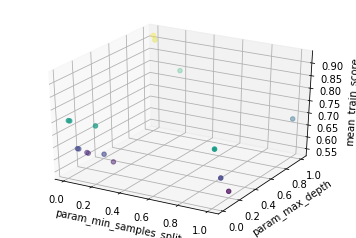

In [78]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

yline = clf.cv_results_['param_max_depth']
xline = clf.cv_results_['param_min_samples_split']
zline = clf.cv_results_['mean_train_score']
yline  = norm = [float(i)/max(yline ) for i in yline]
xline  = norm = [float(i)/max(xline ) for i in xline]

ax.scatter3D(list(xline), list(yline), list(zline), c=list(zline))
ax.set_xlabel('param_min_samples_split')
ax.set_ylabel('param_max_depth')
ax.set_zlabel('mean_train_score')

#### penalty = l2

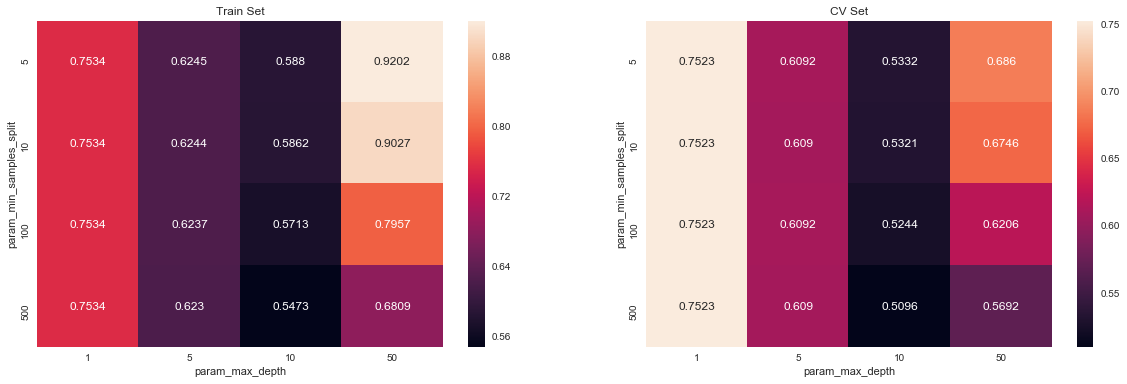

In [79]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [80]:
clf.best_params_

{'max_depth': 1, 'min_samples_split': 5}

In [81]:
max_d = clf.best_params_['max_depth']
min_samp_splt = clf.best_params_['min_samples_split']

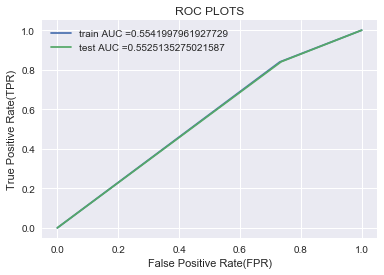

In [112]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt, class_weight='balanced')
DecisionTreeClassifier.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted output
y_train_pred =  batch_predict(DecisionTreeClassifier, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(DecisionTreeClassifier, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

In [113]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions_
    
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_ = predictions
    return predictions

In [114]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.22587308802938164 for threshold 0.535
Train confusion matrix
[[  932  2531]
 [ 3051 15931]]
Test confusion matrix
[[  673  1873]
 [ 2223 11731]]


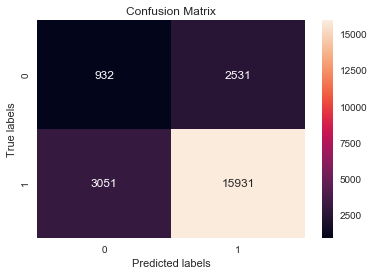

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

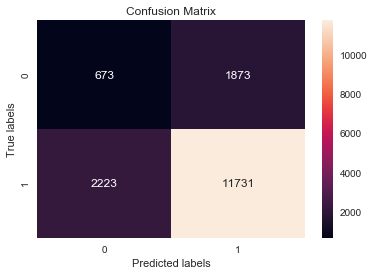

In [116]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [117]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpindex = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions_[i] == 1) :
        fpindex.append(i)
fp_essay = []
fp_price = []
for i in fpindex :
    fp_essay.append(preprocessed_essays[i])
    fp_price.append(price_normalized_test[i])
df5 = pd.DataFrame(fp_price,columns =['price'])

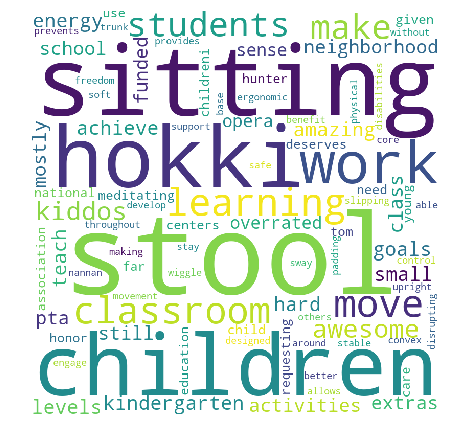

In [118]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [121]:
# first get the columns:
cols = sorted_fi_tfidf_df[:5000].columns
X_test_falsePos = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpindex: # (in fpi all the false positives data points indexes)
    
  X_test_falsePos = X_test_falsePos.append(project_data_test.filter(items=[i], axis=0))

X_test_falsePos.head(2)

,0,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_titles,price,quantity
5,NaN,163188.0,p131454,342b77c0ed2def752fd73f0e702a390a,Mrs.,TX,2016-09-01 18:41:21,grades_prek_2,Developing Language in My Little Learners!,My students need tools and supplies for their ...,0.0,Literacy_Language,ESL Literature_Writing,My students are bilingual learners who have ha...,students bilingual learners hard working paren...,developing language my little learners,437.08,8.0
15,NaN,20866.0,p233783,581d824f8cac22066134853b2f420eb7,Mrs.,IL,2016-09-25 16:05:25,grades_6_8,Teacher On The Go!!!,My students need their teacher to be organized...,16.0,Literacy_Language,Literacy,As a teacher in a low-income/high poverty scho...,teacher low income high poverty school distric...,teacher on the go,421.40,1.0


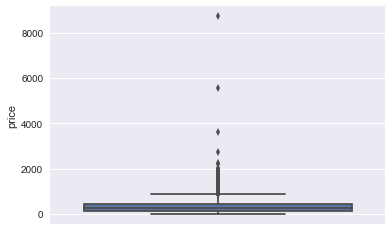

In [122]:
sns.boxplot(y='price', data=X_test_falsePos)

[0.92205019 0.04484784 0.01174586 0.00694074 0.00373732 0.00480513
 0.00106781 0.00160171 0.00160171 0.00160171]
[  0.   21.1  42.2  63.3  84.4 105.5 126.6 147.7 168.8 189.9 211. ]


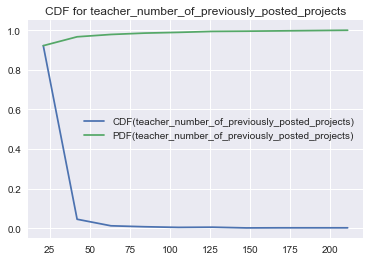

In [123]:
feature = 'teacher_number_of_previously_posted_projects'
counts, bin_edges = np.histogram(X_test_falsePos[feature], bins=10, 
                                         density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:], cdf)
plt.legend(['CDF'+ '(' +feature + ')','PDF'+'('+feature+ ')'])

plt.title('CDF for ' + feature)
plt.show();

## Conclusion

In [144]:
from prettytable import PrettyTable
pt=PrettyTable(['Vectorizer','Model','Hyperparameter(Depth)','Min sample split','Train AUC','Test AUC'])
pt.add_row(['Tfidf','DT',1,5,55.527,55.002])
pt.add_row(['Tfidf W2V','DT',10,5,88.395,55.753])
pt.add_row(['Top 5000 features','DT',1,5,55.419,55.251])
print(pt)

+-------------------+-------+-----------------------+------------------+-----------+----------+
|     Vectorizer    | Model | Hyperparameter(Depth) | Min sample split | Train AUC | Test AUC |
+-------------------+-------+-----------------------+------------------+-----------+----------+
|       Tfidf       |   DT  |           1           |        5         |   55.527  |  55.002  |
|     Tfidf W2V     |   DT  |           10          |        5         |   88.395  |  55.753  |
| Top 5000 features |   DT  |           1           |        5         |   55.419  |  55.251  |
+-------------------+-------+-----------------------+------------------+-----------+----------+
